In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['animation.embed_limit'] = 200 #MB

import math

masa1 = 419725 # kg
masa2 = 5.972e+24 # kg

xoa = 0.0 # m
yoa = 440000 + 6371000 # m
vxia = 7639 #m/s
vyia = 0.0 # m/s

xob = 0.0 # m
yob = 0.0 # m
vxib = 0.0 #m/s
vyib = 0.0 # m/s

t = 0.005 # s

count = 1

In [2]:
def polar_a_cartesiano(modulo, argumento):
    y = math.sin(argumento) * modulo
    x = math.cos(argumento) * modulo    
    return x, y

In [3]:
def cartesiano_a_polar(x,y):

    if x == 0:
        modulo = abs(y)
        if y > 0:
            argumento = math.pi / 2
        else:
            argumento = math.pi * 1.5
    else:
        angulo = math.atan(y / x)
        modulo = math.sqrt(((x)**2)+((y)**2))
        if (x > 0):
            argumento = angulo
        else:
            argumento = angulo + math.pi
    return modulo, argumento

In [4]:
def calculo_fuerza(pxa, pya, pxb, pyb):
    dx = pxb - pxa
    dy = pyb - pya
    
    G = 6.67e-11
    
    if (dx == 0) and (dy == 0):
        print("Los objetos han colisionado")
        
    else:
        r, argumentoF = cartesiano_a_polar(dx,dy)
        
        moduloF = G * ((masa1 * masa2)/(r**2)) #pon las masas como variables externas
        
        return moduloF, argumentoF

In [5]:
def calculo_velocidad(vco, acel, temp):
    v = vco + (acel * temp)
    return v

In [6]:
def calculo_posicion(po, vco, acel, temp):
    p2 = po + (vco * temp) + (0.5 * (acel * (temp ** 2)))
    return p2

In [7]:
def calculo(temp, px1a, py1a, vx1a, vy1a, px1b, py1b, vx1b, vy1b, contador):  

    contador2 = contador+1

    F1a, argumentoa = calculo_fuerza(px1a, py1a, px1b, py1b)
    
    ac1a = F1a / masa1
    ac1xa, ac1ya = polar_a_cartesiano(ac1a, argumentoa)

    F1b = F1a
    argumentob = argumentoa + math.pi
    ac1b = F1b / masa2
    ac1xb, ac1yb = polar_a_cartesiano(ac1b, argumentob)
    
    px2a = calculo_posicion(px1a, vx1a, ac1xa, temp)
    
    py2a = calculo_posicion(py1a, vy1a, ac1ya, temp)
    
    vx2a = calculo_velocidad(vx1a, ac1xa, temp)
    vy2a = calculo_velocidad(vy1a, ac1ya, temp)
    
    px2b = calculo_posicion(px1b, vx1b, ac1xb, temp)
    py2b = calculo_posicion(py1b, vy1b, ac1yb, temp)

    vx2b = calculo_velocidad(vx1b, ac1xb, temp)
    vy2b = calculo_velocidad(vy1b, ac1yb, temp)

    return px2a, py2a, vx2a, vy2a, px2b, py2b, vx2b, vy2b, contador2

In [8]:
tiempo = t

posicionxa = xoa
posicionya = yoa
    
velocidadxa = vxia
velocidadya = vyia
    
posicionxb = xob
posicionyb = yob

velocidadxb = vxib
velocidadyb = vyib

In [9]:
posicionxa_sample = []
posicionya_sample = []
posicionxb_sample = []
posicionyb_sample = []

In [10]:
n = 4000
num = 0
while count < 1120000:
    px2a, py2a, vx2a, vy2a, px2b, py2b, vx2b, vy2b, count2 = calculo(tiempo, posicionxa, posicionya, velocidadxa, velocidadya, posicionxb, posicionyb, velocidadxb, velocidadyb, count)

    count = count2
    
    posicionxa = px2a
    posicionya = py2a
    
    velocidadxa = vx2a
    velocidadya = vy2a
    
    posicionxb = px2b
    posicionyb = py2b

    velocidadxb = vx2b
    velocidadyb = vy2b

    if num < n:
        num += 1
    else:   

        posicionxa_sample.append(posicionxa)
        posicionya_sample.append(posicionya)
        posicionxb_sample.append(posicionxb)
        posicionyb_sample.append(posicionyb)

        num = 0

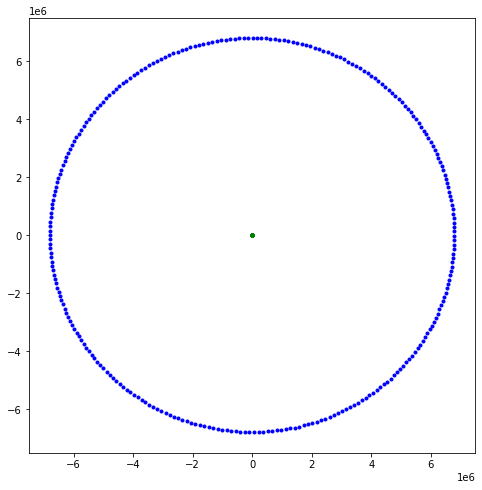

In [11]:
plt.figure(figsize=(8,8))

plt.xlim([-7500000, 7500000])
plt.ylim([-7500000, 7500000])

plt.plot(posicionxa_sample, posicionya_sample,'b.');
plt.plot(posicionxb_sample, posicionyb_sample,'g.');

In [12]:
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams["figure.dpi"] = 100  
plt.ioff()

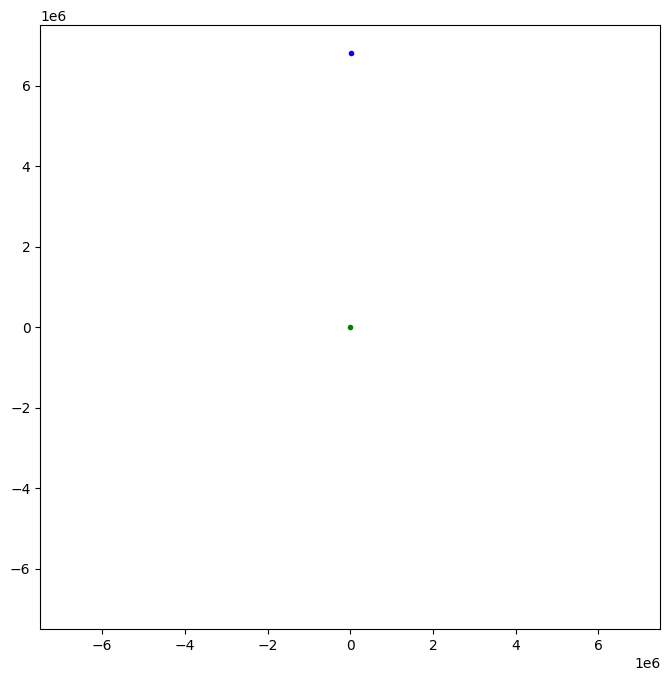

In [13]:
fig, ax = plt.subplots(figsize=(8,8))

def animate(i):
    plt.cla()
    plt.xlim([-7500000, 7500000])
    plt.ylim([-7500000, 7500000])
    plt.plot(posicionxa_sample[i], posicionya_sample[i], 'b.')
    plt.plot(posicionxb_sample[i], posicionyb_sample[i], 'g.')

matplotlib.animation.FuncAnimation(fig, animate, frames=len(posicionxa_sample))